### Importación de datos



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito                   4   6.25184 -75.56359  
2  Tarjeta de crédito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [95]:
len(tienda['Categoría del Producto'].unique())

8

In [3]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [4]:
tienda['Fecha de Compra'].dtype

dtype('O')

In [5]:
# Transformando los datos de tipo de tiempo
for df in [tienda, tienda2, tienda3, tienda4]:
    if df['Fecha de Compra'].dtype == 'object':
      df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'],format='%d/%m/%Y')
tienda['Fecha de Compra'].sample(5)

216   2022-11-10
289   2022-11-24
608   2022-03-23
33    2020-04-26
967   2022-06-15
Name: Fecha de Compra, dtype: datetime64[ns]

In [6]:
tienda.shape, tienda2.shape, tienda3.shape, tienda4.shape

((2359, 12), (2359, 12), (2359, 12), (2358, 12))

In [7]:
tienda.info(), tienda2.info(), tienda3.info(), tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2359 non-null   object        
 1   Categoría del Producto  2359 non-null   object        
 2   Precio                  2359 non-null   float64       
 3   Costo de envío          2359 non-null   float64       
 4   Fecha de Compra         2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Lugar de Compra         2359 non-null   object        
 7   Calificación            2359 non-null   int64         
 8   Método de pago          2359 non-null   object        
 9   Cantidad de cuotas      2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

(None, None, None, None)

In [8]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [9]:
tienda.sample(5)

Producto Categoría del Producto    Precio  \
1662  Bloques de construcción               Juguetes   34400.0   
1568                 Cama box                Muebles  457800.0   
1881            Juego de mesa               Juguetes  181000.0   
1941      Balón de baloncesto   Deportes y diversión   61700.0   
1067                Cama king                Muebles  630300.0   

      Costo de envío Fecha de Compra         Vendedor Lugar de Compra  \
1662          2000.0      2020-03-08  Izabela de León          Bogotá   
1568         22600.0      2020-05-14    Lucas Olivera          Bogotá   
1881         10200.0      2021-11-19  Ángel Rodriguez          Bogotá   
1941          1500.0      2022-07-04   Santiago Silva          Bogotá   
1067         33800.0      2023-03-31  Mariana Herrera        Medellín   

      Calificación      Método de pago  Cantidad de cuotas      lat       lon  
1662             4  Tarjeta de crédito                   2  4.60971 -74.08175  
1568             4  Tarjeta de crédito                   2  4.60971 -74.08175  
1881             5  Tarjeta de crédito                   1  4.60971 -74.08175  
1941             3  Tarjeta de crédito                   4  4.60971 -74.08175  
1067             1               Cupón                   1  6.25184 -75.56359

In [10]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2359 non-null   object        
 1   Categoría del Producto  2359 non-null   object        
 2   Precio                  2359 non-null   float64       
 3   Costo de envío          2359 non-null   float64       
 4   Fecha de Compra         2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Lugar de Compra         2359 non-null   object        
 7   Calificación            2359 non-null   int64         
 8   Método de pago          2359 non-null   object        
 9   Cantidad de cuotas      2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

In [11]:
len(tienda['Producto'].unique())

51

In [12]:
# Lista con los dataframes de las cuatro tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]


In [13]:
# Exploración de cada tienda
for nombre, df in zip(nombres, tiendas):
    display(f"📊 Exploración de {nombre}")

    # Dimensiones del DataFrame
    display({"Filas": df.shape[0], "Columnas": df.shape[1]})

    # Primeras filas
    display(df.head())

    # Tipos de datos y valores nulos
    display(df.info())

    # Estadísticas descriptivas de las columnas numéricas
    display(df.describe())

    # Distribución de las categorías (si existe columna 'Categoria')
    if "Categoria" in df.columns:
        display(df["Categoria"].value_counts().head(10))

    # Evaluación de compra (si existe columna 'Evaluacion')
    if "Evaluacion" in df.columns:
        display(df["Evaluacion"].describe())

    # Método de pago más usado (si existe columna 'Tipo_Pago')
    if "Tipo_Pago" in df.columns:
        display(df["Tipo_Pago"].value_counts().head())


'📊 Exploración de Tienda 1'

{'Filas': 2359, 'Columnas': 12}

Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      2021-01-16      Pedro Gomez          Bogotá             4   
1      2022-05-18  Beatriz Morales        Medellín             1   
2      2021-03-15   Juan Fernandez       Cartagena             1   
3      2022-05-03   Juan Fernandez            Cali             4   
4      2020-11-07    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito                   4   6.25184 -75.56359  
2  Tarjeta de crédito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2359 non-null   object        
 1   Categoría del Producto  2359 non-null   object        
 2   Precio                  2359 non-null   float64       
 3   Costo de envío          2359 non-null   float64       
 4   Fecha de Compra         2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Lugar de Compra         2359 non-null   object        
 7   Calificación            2359 non-null   int64         
 8   Método de pago          2359 non-null   object        
 9   Cantidad de cuotas      2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

None

Precio  Costo de envío                Fecha de Compra  \
count  2.359000e+03     2359.000000                           2359   
mean   4.878679e+05    26018.609580  2021-08-17 12:02:08.189911296   
min    7.600000e+03        0.000000            2020-01-01 00:00:00   
25%    5.575000e+04     3100.000000            2020-10-26 00:00:00   
50%    2.353000e+05    12400.000000            2021-08-23 00:00:00   
75%    6.781000e+05    36000.000000            2022-06-06 00:00:00   
max    2.977000e+06   160800.000000            2023-03-31 00:00:00   
std    6.146868e+05    32860.001783                            NaN   

       Calificación  Cantidad de cuotas          lat          lon  
count   2359.000000         2359.000000  2359.000000  2359.000000  
mean       3.976685            2.943196     5.365283   -74.789417  
min        1.000000            1.000000    -4.215280   -77.281110  
25%        3.000000            1.000000     4.609710   -75.563590  
50%        5.000000            1.000000     4.609710   -74.199040  
75%        5.000000            4.000000     6.251840   -74.081750  
max        5.000000           24.000000    11.544440   -67.923900  
std        1.415370            2.819897     2.287445     1.217827

'📊 Exploración de Tienda 2'

{'Filas': 2359, 'Columnas': 12}

Producto  Categoría del Producto    Precio  Costo de envío  \
0  Silla de oficina                 Muebles  283600.0         15300.0   
1         Pandereta  Instrumentos musicales   76800.0          2300.0   
2         Cama king                 Muebles  443300.0         23800.0   
3         Cama king                 Muebles  906200.0         46400.0   
4  Silla de oficina                 Muebles  397800.0         19400.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      2021-08-04  Izabela de León        Medellín             1   
1      2020-11-26   Blanca Ramirez        Medellín             3   
2      2021-10-22  Izabela de León         Pereira             5   
3      2022-05-04    Maria Alfonso            Cali             5   
4      2022-02-26    Lucas Olivera          Bogotá             4   

       Método de pago  Cantidad de cuotas      lat       lon  
0               Nequi                   1  6.25184 -75.56359  
1  Tarjeta de crédito                   4  6.25184 -75.56359  
2  Tarjeta de crédito                  10  4.81333 -75.69611  
3  Tarjeta de crédito                  10  3.43722 -76.52250  
4  Tarjeta de crédito                   3  4.60971 -74.08175

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2359 non-null   object        
 1   Categoría del Producto  2359 non-null   object        
 2   Precio                  2359 non-null   float64       
 3   Costo de envío          2359 non-null   float64       
 4   Fecha de Compra         2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Lugar de Compra         2359 non-null   object        
 7   Calificación            2359 non-null   int64         
 8   Método de pago          2359 non-null   object        
 9   Cantidad de cuotas      2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

None

Precio  Costo de envío                Fecha de Compra  \
count  2.359000e+03     2359.000000                           2359   
mean   4.732274e+05    25216.235693  2021-08-23 05:49:09.894022912   
min    7.600000e+03        0.000000            2020-01-01 00:00:00   
25%    5.455000e+04     2900.000000            2020-10-31 00:00:00   
50%    2.182000e+05    11600.000000            2021-08-27 00:00:00   
75%    6.777000e+05    35450.000000            2022-06-10 00:00:00   
max    2.953400e+06   162500.000000            2023-03-31 00:00:00   
std    5.955595e+05    31741.375166                            NaN   

       Calificación  Cantidad de cuotas          lat          lon  
count   2359.000000         2359.000000  2359.000000  2359.000000  
mean       4.037304            2.902501     5.499753   -74.742963  
min        1.000000            1.000000    -4.215280   -77.281110  
25%        4.000000            1.000000     4.609710   -75.563590  
50%        5.000000            1.000000     4.609710   -74.199040  
75%        5.000000            4.000000     6.251840   -74.081750  
max        5.000000           24.000000    11.544440   -67.923900  
std        1.356153            2.848416     2.351118     1.185997

'📊 Exploración de Tienda 3'

{'Filas': 2359, 'Columnas': 12}

Producto  Categoría del Producto     Precio  Costo de envío  \
0   Secadora de ropa       Electrodomésticos  1285100.0         66600.0   
1      Mesa de noche                 Muebles   290100.0         13600.0   
2  Guitarra acústica  Instrumentos musicales   303500.0         17400.0   
3  Balón de voleibol    Deportes y diversión    58800.0          3300.0   
4            Armario                 Muebles   521100.0         25900.0   

  Fecha de Compra        Vendedor Lugar de Compra  Calificación  \
0      2021-12-17   Camila Rivera     Santa Marta             4   
1      2021-02-10   Maria Alfonso            Cali             3   
2      2023-01-22   Lucas Olivera          Bogotá             5   
3      2022-03-22     Pedro Gomez    Barranquilla             4   
4      2022-01-12  Blanca Ramirez          Bogotá             1   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   4  11.24079 -74.19904  
1  Tarjeta de crédito                   1   3.43722 -76.52250  
2  Tarjeta de crédito                   3   4.60971 -74.08175  
3  Tarjeta de crédito                   6  10.96854 -74.78132  
4  Tarjeta de crédito                   1   4.60971 -74.08175

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2359 non-null   object        
 1   Categoría del Producto  2359 non-null   object        
 2   Precio                  2359 non-null   float64       
 3   Costo de envío          2359 non-null   float64       
 4   Fecha de Compra         2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Lugar de Compra         2359 non-null   object        
 7   Calificación            2359 non-null   int64         
 8   Método de pago          2359 non-null   object        
 9   Cantidad de cuotas      2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

None

Precio  Costo de envío                Fecha de Compra  \
count  2.359000e+03     2359.000000                           2359   
mean   4.654598e+05    24805.680373  2021-08-22 16:01:25.459940608   
min    7.600000e+03        0.000000            2020-01-01 00:00:00   
25%    5.740000e+04     3100.000000            2020-10-27 12:00:00   
50%    2.263000e+05    11900.000000            2021-09-06 00:00:00   
75%    6.660500e+05    34950.000000            2022-06-15 12:00:00   
max    2.968200e+06   158400.000000            2023-03-31 00:00:00   
std    5.806434e+05    30945.889626                            NaN   

       Calificación  Cantidad de cuotas          lat          lon  
count   2359.000000         2359.000000  2359.000000  2359.000000  
mean       4.048326            2.967783     5.437076   -74.733463  
min        1.000000            1.000000    -4.215280   -77.281110  
25%        4.000000            1.000000     4.609710   -75.563590  
50%        5.000000            2.000000     4.609710   -74.199040  
75%        5.000000            4.000000     6.251840   -74.081750  
max        5.000000           24.000000    11.544440   -67.923900  
std        1.386426            2.812153     2.405272     1.224572

'📊 Exploración de Tienda 4'

{'Filas': 2358, 'Columnas': 12}

Producto Categoría del Producto     Precio  Costo de envío  \
0         Lavavajillas      Electrodomésticos  1084800.0         56000.0   
1             Cama box                Muebles   473800.0         25400.0   
2  Balón de baloncesto   Deportes y diversión    23700.0             0.0   
3  Modelado predictivo                 Libros    57700.0          1300.0   
4          Auriculares           Electrónicos   138900.0          5600.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      2022-11-11    Rafael Acosta          Bogotá             4   
1      2020-01-03  Izabela de León          Cúcuta             5   
2      2022-12-25    Maria Alfonso        Medellín             5   
3      2021-11-23    Lucas Olivera        Medellín             3   
4      2022-04-25   Blanca Ramirez          Bogotá             4   

       Método de pago  Cantidad de cuotas      lat       lon  
0  Tarjeta de crédito                   3  4.60971 -74.08175  
1  Tarjeta de crédito                   2  7.89391 -72.50782  
2               Nequi                   1  6.25184 -75.56359  
3               Nequi                   1  6.25184 -75.56359  
4  Tarjeta de crédito                   7  4.60971 -74.08175

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2358 non-null   object        
 1   Categoría del Producto  2358 non-null   object        
 2   Precio                  2358 non-null   float64       
 3   Costo de envío          2358 non-null   float64       
 4   Fecha de Compra         2358 non-null   datetime64[ns]
 5   Vendedor                2358 non-null   object        
 6   Lugar de Compra         2358 non-null   object        
 7   Calificación            2358 non-null   int64         
 8   Método de pago          2358 non-null   object        
 9   Cantidad de cuotas      2358 non-null   int64         
 10  lat                     2358 non-null   float64       
 11  lon                     2358 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

None

Precio  Costo de envío                Fecha de Compra  \
count  2.358000e+03     2358.000000                           2358   
mean   4.403629e+05    23459.457167  2021-08-01 20:25:38.931297792   
min    7.600000e+03        0.000000            2020-01-01 00:00:00   
25%    5.340000e+04     2900.000000            2020-10-23 06:00:00   
50%    2.094500e+05    10950.000000            2021-07-28 00:00:00   
75%    6.342250e+05    33300.000000            2022-05-12 00:00:00   
max    2.902200e+06   154700.000000            2023-03-30 00:00:00   
std    5.687556e+05    30279.100836                            NaN   

       Calificación  Cantidad de cuotas          lat          lon  
count   2358.000000         2358.000000  2358.000000  2358.000000  
mean       3.995759            2.896098     5.413519   -74.774597  
min        1.000000            1.000000    -4.215280   -77.281110  
25%        3.000000            1.000000     4.609710   -75.563590  
50%        5.000000            1.000000     4.609710   -74.199040  
75%        5.000000            4.000000     6.251840   -74.081750  
max        5.000000           18.000000    11.544440   -67.923900  
std        1.403063            2.730393     2.376728     1.199749

#1. Análisis de facturación



In [14]:
# Diccionario para guardar resultados
ingresos = {}

for nombre, df in zip(nombres, tiendas):
    if "Precio" in df.columns:
        ingresos[nombre] = df["Precio"].sum()/10**6

# Mostrar resultados en un DataFrame
df_ingresos = pd.DataFrame.from_dict(ingresos, orient="index", columns=["Ingreso Total [Millones de pesos]"])
display(df_ingresos.sort_values(by='Ingreso Total [Millones de pesos]', ascending=False))


Ingreso Total [Millones de pesos]
Tienda 1                          1150.8804
Tienda 2                          1116.3435
Tienda 3                          1098.0196
Tienda 4                          1038.3757

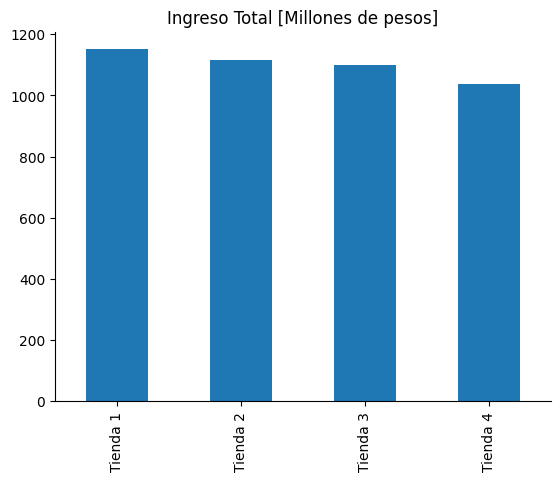

In [15]:
from matplotlib import pyplot as plt
df_ingresos['Ingreso Total [Millones de pesos]'].plot(kind='bar', title='Ingreso Total [Millones de pesos]')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
#Ingresos mensuales de cada tienda
ingresos_mensuales = {}

for nombre, df in zip(nombres, tiendas):
    # Extraer mes y año de la fecha de compra
    df['Mes_Año'] = df['Fecha de Compra'].dt.to_period('M')

    # Agrupar por mes y año y sumar los precios
    ingresos_por_mes = df.groupby('Mes_Año')['Precio'].sum()/10**6

    # Guardar en el diccionario
    ingresos_mensuales[nombre] = ingresos_por_mes

# Mostrar resultados
"""for nombre, ingresos in ingresos_mensuales.items():
    display(f"📊 Ingresos mensuales para {nombre} [Millones de pesos]")
    display(ingresos)
"""
ingresos_mensuales

{'Tienda 1': Mes_Año
 2020-01    33.0843
 2020-02    40.0540
 2020-03    31.5623
 2020-04    33.6661
 2020-05    38.5829
 2020-06    26.2967
 2020-07    35.0855
 2020-08    31.1265
 2020-09    30.2438
 2020-10    21.1343
 2020-11    19.8693
 2020-12    28.2275
 2021-01    25.5540
 2021-02    32.6177
 2021-03    29.3485
 2021-04    22.6373
 2021-05    27.8021
 2021-06    30.8101
 2021-07    36.8780
 2021-08    34.8703
 2021-09    44.5711
 2021-10    27.5360
 2021-11    26.1712
 2021-12    23.3245
 2022-01    26.2333
 2022-02    27.7999
 2022-03    25.3667
 2022-04    22.3844
 2022-05    25.0978
 2022-06    24.9845
 2022-07    27.2514
 2022-08    27.7960
 2022-09    37.1110
 2022-10    14.6820
 2022-11    23.6563
 2022-12    34.2023
 2023-01    28.9301
 2023-02    37.2277
 2023-03    37.1030
 Freq: M, Name: Precio, dtype: float64,
 'Tienda 2': Mes_Año
 2020-01    31.1295
 2020-02    17.3888
 2020-03    30.5159
 2020-04    27.6466
 2020-05    25.4623
 2020-06    26.0561
 2020-07    23.547

In [17]:
import plotly.express as px

# Combine the monthly income data into a single DataFrame for Plotly
ingresos_df = pd.DataFrame(ingresos_mensuales)
ingresos_df.index.name = 'Mes_Año'
ingresos_df = ingresos_df.reset_index()

# Convert 'Mes_Año' to datetime for better plotting with Plotly
ingresos_df['Mes_Año'] = ingresos_df['Mes_Año'].astype(str)

# Plotting using Plotly Express
fig = px.line(ingresos_df, x='Mes_Año', y=ingresos_df.columns, title='Ingresos Mensuales por Tienda')
fig.update_layout(
    xaxis_title='Mes y Año',
    yaxis_title='Ingresos [Millones de pesos]'
)
fig.show()

## 1.1 Facturación global

In [18]:
# Contribución de cada tienda al global de ingresos
df_ingresos = df_ingresos.reset_index().rename(columns={'index': 'TIENDAS'})
display(df_ingresos)

TIENDAS  Ingreso Total [Millones de pesos]
0  Tienda 1                          1150.8804
1  Tienda 2                          1116.3435
2  Tienda 3                          1098.0196
3  Tienda 4                          1038.3757

In [19]:
total_ingreso_global = df_ingresos['Ingreso Total [Millones de pesos]'].sum()
df_ingresos['Porcentaje del Total'] = (df_ingresos['Ingreso Total [Millones de pesos]'] / total_ingreso_global).round(4) * 100
display(df_ingresos[['TIENDAS', 'Ingreso Total [Millones de pesos]', 'Porcentaje del Total']])


TIENDAS  Ingreso Total [Millones de pesos]  Porcentaje del Total
0  Tienda 1                          1150.8804                 26.13
1  Tienda 2                          1116.3435                 25.35
2  Tienda 3                          1098.0196                 24.93
3  Tienda 4                          1038.3757                 23.58

# 2. Ventas por categoría

In [20]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Mes_Año'],
      dtype='object')

In [55]:
tienda.groupby("Categoría del Producto")["Precio"].mean().sort_values(ascending=False)/10**3


Categoría del Producto
Electrodomésticos          1165.657692
Electrónicos                958.690848
Instrumentos musicales      501.642857
Muebles                     403.513333
Deportes y diversión        138.345070
Artículos para el hogar      74.259649
Juguetes                     55.542284
Libros                       50.779769
Name: Precio, dtype: float64

In [22]:
# Resultados
categorias_populares = {}

for nombre, df in zip(nombres, tiendas):
    # Agrupamos por categoría y contamos las ventas
    conteo = df.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)

    # Guardamos en el diccionario
    categorias_populares[nombre] = conteo

    # Mostramos solo las 5 más populares
    display(f"📊 Categorías más populares en {nombre}")
    display(conteo.head())


'📊 Categorías más populares en Tienda 1'

Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: Producto, dtype: int64

'📊 Categorías más populares en Tienda 2'

Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: Producto, dtype: int64

'📊 Categorías más populares en Tienda 3'

Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: Producto, dtype: int64

'📊 Categorías más populares en Tienda 4'

Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: Producto, dtype: int64

In [58]:
# Resultados
categorias_populares_df = pd.DataFrame(categorias_populares).sort_values(by='Tienda 1', ascending=False)
categorias_populares_df


Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Muebles                       465       442       499       480
Electrónicos                  448       422       451       451
Juguetes                      324       313       315       338
Electrodomésticos             312       305       278       254
Deportes y diversión          284       275       277       277
Instrumentos musicales        182       224       177       170
Libros                        173       197       185       187
Artículos para el hogar       171       181       177       201

In [69]:
categorias_mas_vendidad_global = categorias_populares_df.sum(1)
categorias_mas_vendidad_global

Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
dtype: int64

In [62]:
total_productos_vendidos = categorias_populares_df.sum().sum()
total_productos_vendidos

np.int64(9435)

In [70]:
categorias_porcentaje_global = (categorias_mas_vendidad_global  / total_productos_vendidos) * 100
categorias_porcentaje_global


Categoría del Producto
Muebles                    19.989401
Electrónicos               18.781134
Juguetes                   13.672496
Electrodomésticos          12.178060
Deportes y diversión       11.796502
Instrumentos musicales      7.980922
Libros                      7.864335
Artículos para el hogar     7.737149
dtype: float64

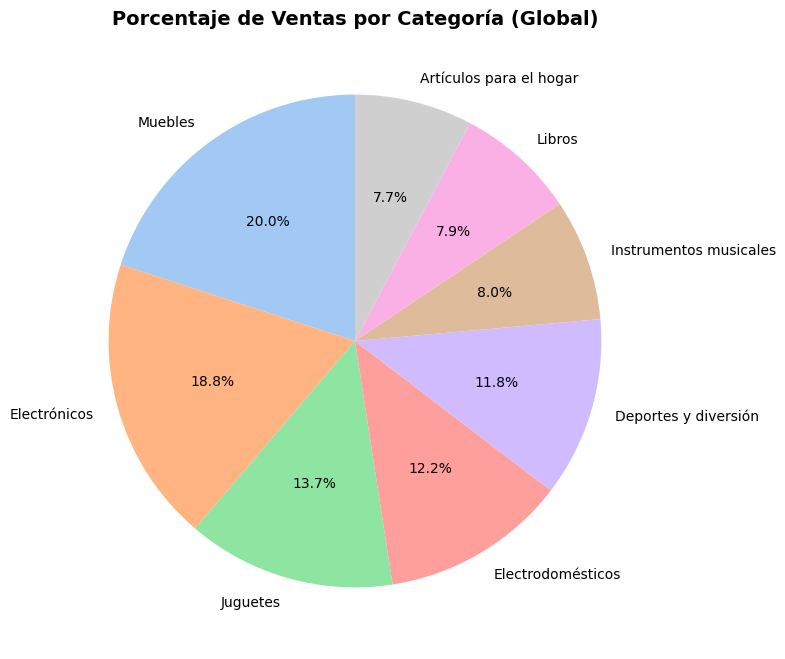

In [101]:
def plot_categorias_global():
  # Crear el gráfico de pastel
  # Create the pie chart
  plt.figure(figsize=(8, 8))
  plt.pie(categorias_porcentaje_global, labels=categorias_porcentaje_global.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette('pastel'))
  plt.title("Porcentaje de Ventas por Categoría (Global)", fontsize=14, fontweight="bold")
  return plt
plot_categorias_global().show()

In [24]:
categorias_populares_df.idxmax()

Tienda 1    Muebles
Tienda 2    Muebles
Tienda 3    Muebles
Tienda 4    Muebles
dtype: object

In [25]:
categorias_populares_df.max()

Tienda 1    465
Tienda 2    442
Tienda 3    499
Tienda 4    480
dtype: int64

# 3. Calificación promedio de la tienda


In [26]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Mes_Año'],
      dtype='object')

In [27]:
tienda['Calificación'].mean()

np.float64(3.976685036032217)

In [28]:
# Diccionario de resultados
valoraciones = {}

for nombre, df in zip(nombres, tiendas):
    if "Calificación" in df.columns:
        valoraciones[nombre] = df["Calificación"].mean()

# Mostrar resultados en un DataFrame
df_valoraciones = pd.DataFrame.from_dict(valoraciones, orient="index", columns=["Calificación Promedio"])
display(df_valoraciones.round(4).sort_values(by='Calificación Promedio', ascending=False))


Calificación Promedio
Tienda 3                 4.0483
Tienda 2                 4.0373
Tienda 4                 3.9958
Tienda 1                 3.9767

In [29]:
type(valoraciones)

dict

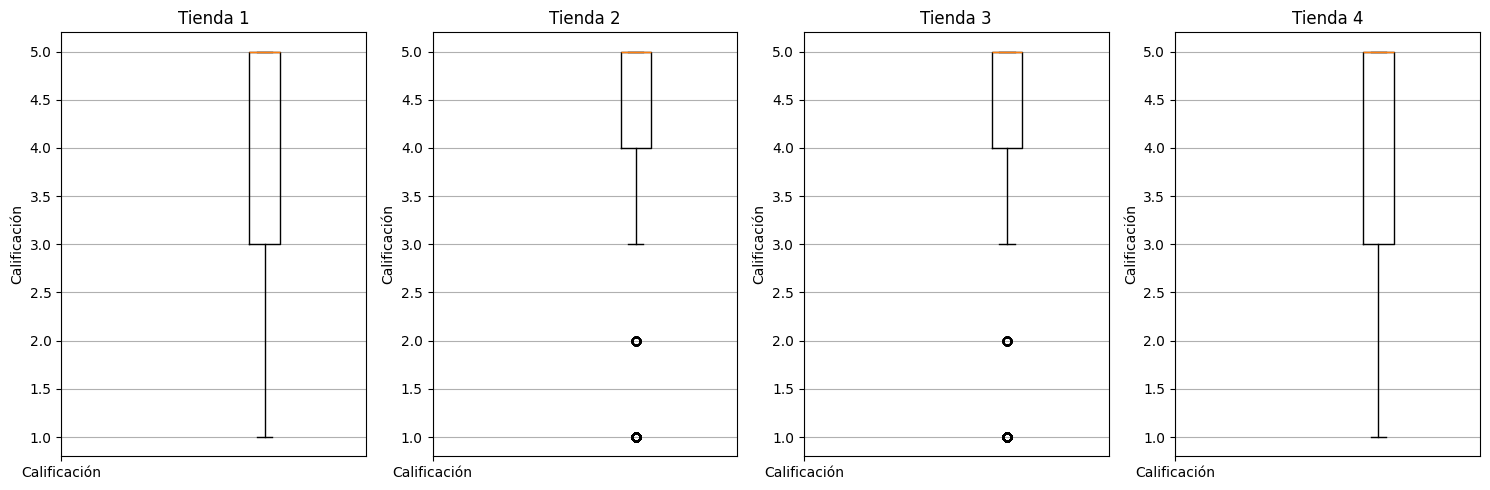

In [30]:
fig, axes = plt.subplots(1, len(tiendas), figsize=(15, 5)) # Create subplots

for i, df in enumerate(tiendas):
    axes[i].grid(True)
    axes[i].boxplot(df['Calificación'])
    axes[i].set_title(nombres[i])
    axes[i].set_ylabel("Calificación")
    axes[i].set_xticks([0]) # Set the x-tick to 1 for a single boxplot
    axes[i].set_xticklabels(['Calificación']) # Set the x-tick label


plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def boxplot_calificaciones():
  fig, axes = plt.subplots(1, len(tiendas), figsize=(15, 5))

  for i, df in enumerate(tiendas):
      axes[i].grid(True)

      # Crear boxplot
      bp = axes[i].boxplot(df['Calificación'], patch_artist=True)

      # Calcular cuartiles
      q1 = np.percentile(df['Calificación'], 25)
      median = np.percentile(df['Calificación'], 50)
      q3 = np.percentile(df['Calificación'], 75)

      # Dibujar etiquetas de cuartiles y mediana
      axes[i].text(1.1, q1, f"Q1={q1:.2f}", va="center", fontsize=9, color="blue")
      #axes[i].text(1.1, median, f"Mediana={median:.2f}", va="center", fontsize=9, color="red", fontweight="bold")
      axes[i].text(1.1, q3, f"Q3={q3:.2f}", va="center", fontsize=9, color="blue")

      # Ajustar título y etiquetas
      axes[i].set_title(nombres[i])
      axes[i].set_ylabel("Calificación")
      axes[i].set_xticks([1])
      axes[i].set_xticklabels(['Calificación'])

  plt.tight_layout()
  return plt


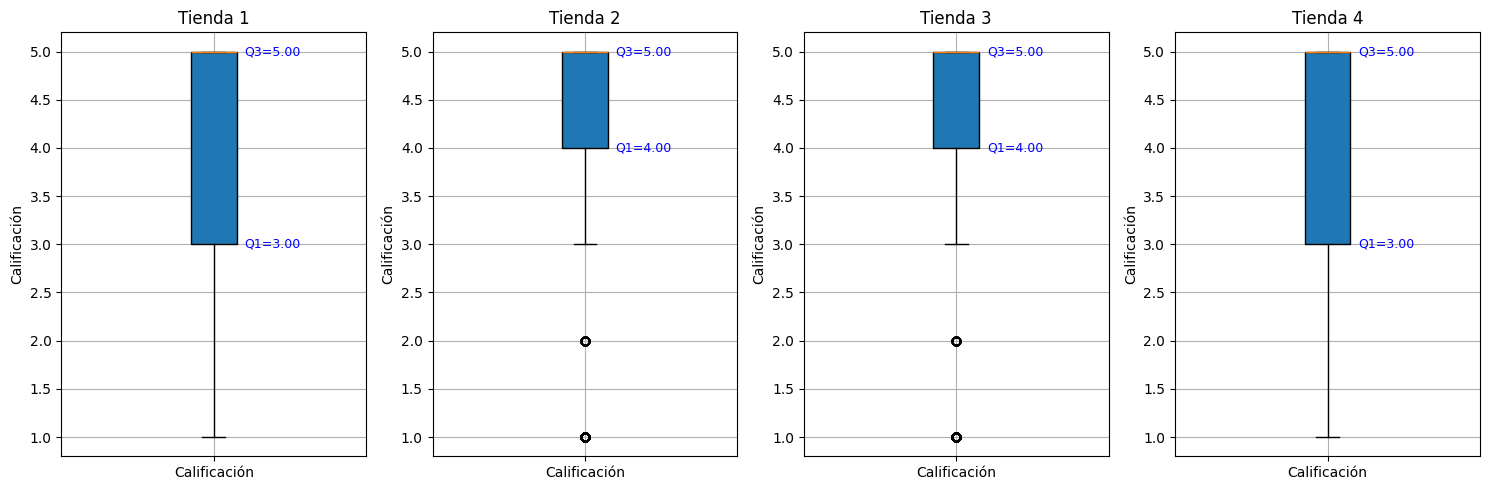

In [32]:
boxplot_calificaciones().show()

'📊 Boxplot de Calificación para Tienda 1'

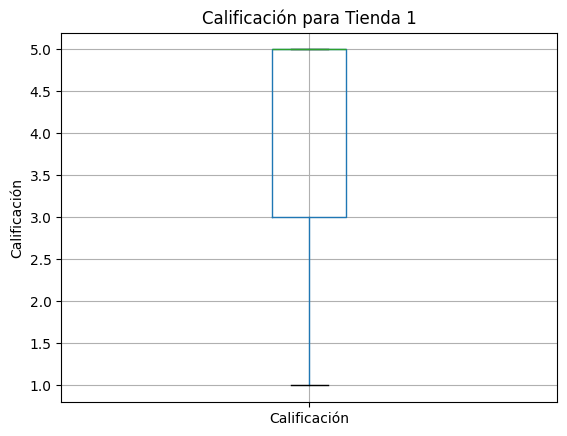

'📊 Boxplot de Calificación para Tienda 2'

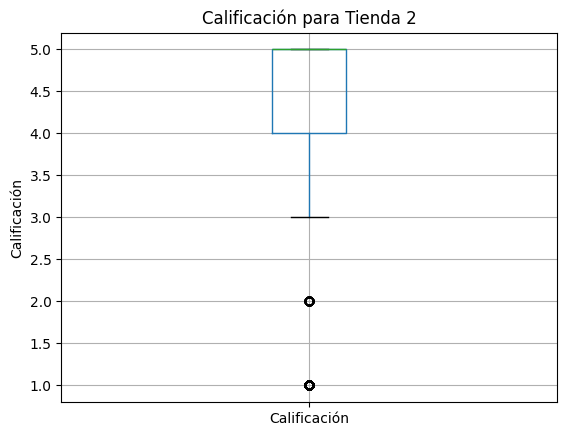

'📊 Boxplot de Calificación para Tienda 3'

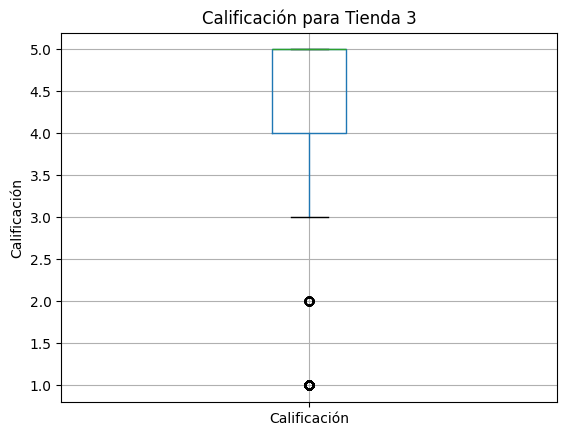

'📊 Boxplot de Calificación para Tienda 4'

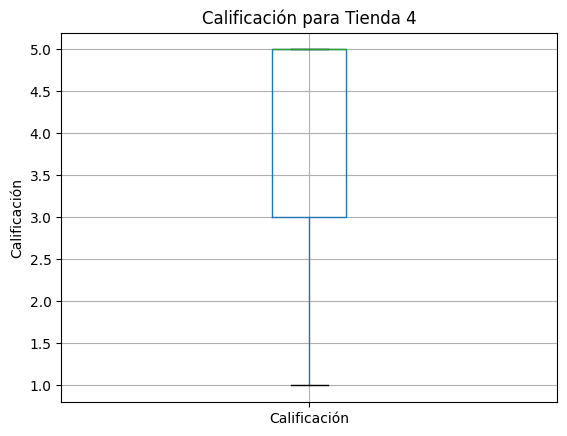

In [33]:
for nombre, df in zip(nombres, tiendas):
    display(f"📊 Boxplot de Calificación para {nombre}")
    plt.figure() # Create a new figure for each boxplot
    df.boxplot(column='Calificación',)
    plt.title(f"Calificación para {nombre}")
    plt.ylabel("Calificación")
    plt.show()

In [34]:
tienda.groupby('Categoría del Producto')["Calificación"].mean().sort_values(ascending=False)

Categoría del Producto
Juguetes                   4.077160
Instrumentos musicales     4.049451
Electrodomésticos          4.032051
Electrónicos               4.004464
Libros                     3.976879
Muebles                    3.946237
Deportes y diversión       3.897887
Artículos para el hogar    3.748538
Name: Calificación, dtype: float64

In [35]:
#Valoraciones por categoria de producto
# Diccionario de resultados
#valoraciones_cat_prod = {}
valoraciones_cat_prod = pd.DataFrame()
for nombre, df in zip(nombres, tiendas):
    if "Calificación" in df.columns:
        valoraciones_cat_prod[f"{nombre} score_prod"] = df.groupby('Categoría del Producto')["Calificación"].mean().sort_values(ascending=False)

# Mostrar resultados en un DataFrame
#df_valoraciones_cat_prod = pd.DataFrame.from_dict(valoraciones_cat_prod, orient="index", columns=["Calificación Promedio"])
#display(df_valoraciones_cat_prod.round(2))
valoraciones_cat_prod

Tienda 1 score_prod  Tienda 2 score_prod  \
Categoría del Producto                                              
Juguetes                            4.077160             4.025559   
Instrumentos musicales              4.049451             4.035714   
Electrodomésticos                   4.032051             4.072131   
Electrónicos                        4.004464             3.971564   
Libros                              3.976879             3.949239   
Muebles                             3.946237             4.092760   
Deportes y diversión                3.897887             4.065455   
Artículos para el hogar             3.748538             4.071823   

                         Tienda 3 score_prod  Tienda 4 score_prod  
Categoría del Producto                                             
Juguetes                            4.196825             3.988166  
Instrumentos musicales              4.005650             3.911765  
Electrodomésticos                   4.010791             3.929134  
Electrónicos                        3.986696             4.006652  
Libros                              4.048649             4.042781  
Muebles                             4.098196             3.997917  
Deportes y diversión                3.938628             4.054152  
Artículos para el hogar             4.073446             4.009950

# 4. Productos más y menos vendidos

In [36]:
# Diccionario para guardar los productos más vendidos por tienda
productos_mas_vendidos_x_tienda = pd.DataFrame()

for nombre, df in zip(nombres, tiendas):
    if "Producto" in df.columns:
        #df.groupby("Producto")["Producto"].count().sort_values(ascending=False)
        # Guardar en el diccionario
        productos_mas_vendidos_x_tienda[nombre] = df.groupby("Producto")["Producto"].count().sort_values(ascending=False)

# Mostrar resultados en un DataFrame
#df_productos_mas_vendidos = pd.DataFrame.from_dict(productos_mas_vendidos_x_tienda, orient="index")
display(productos_mas_vendidos_x_tienda)

Tienda 1  Tienda 2  Tienda 3  Tienda 4
Producto                                                           
Armario                            60        54        49        34
TV LED UHD 4K                      60        45        42        40
Microondas                         60        62        36        48
Secadora de ropa                   58        57        45        40
Mesa de noche                      56        44        55        55
Bloques de construcción            56        54        35        54
Balón de baloncesto                55        42        50        50
Bicicleta                          54        45        52        45
Impresora                          54        34        50        50
Vaso térmico                       54        47        38        48
Refrigerador                       54        49        50        38
Batería                            53        61        41        48
Cubertería                         52        39        39        59
Carrito de control remoto          52        47        52        55
Modelado predictivo                51        46        53        50
Auriculares                        50        37        43        44
Ajedrez de madera                  49        45        47        39
Iphone 15                          49        55        46        48
Lavavajillas                       48        46        52        43
Guitarra eléctrica                 47        47        38        33
Lavadora de ropa                   47        49        42        38
Silla de oficina                   46        49        46        40
Sofá reclinable                    46        44        45        47
Guitarra acústica                  46        58        47        37
Estufa                             45        42        53        47
Mesa de centro                     44        45        42        44
Kit de bancas                      44        45        57        42
Cama box                           44        47        46        62
Cubo mágico 8x8                    44        45        44        47
Smart TV                           44        40        54        54
Cama king                          44        45        56        56
Juego de mesa                      43        32        52        48
Smartwatch                         43        44        46        39
Set de ollas                       43        52        55        50
Dashboards con Power BI            42        43        40        56
Tablet ABXY                        42        44        48        45
Balón de voleibol                  42        46        48        48
Sillón                             41        35        47        45
Iniciando en programación          41        65        46        43
Set de vasos                       41        46        36        46
Asistente virtual                  40        38        39        50
Dinosaurio Rex                     40        42        46        47
Cuerda para saltar                 40        50        53        43
Muñeca bebé                        40        48        39        48
Mesa de comedor                    40        34        56        55
Ciencia de datos con Python        39        43        46        38
Mochila                            39        45        36        43
Pandereta                          36        58        51        52
Olla de presión                    35        44        47        46
Celular ABXY                       33        41        44        39
Auriculares con micrófono          33        44        39        42

In [37]:
# Diccionario para guardar los productos más vendidos por tienda
productos_mas_vendidos = {}

for nombre, df in zip(nombres, tiendas):
    if "Producto" in df.columns:
        # Contar la frecuencia de cada producto
        conteo_productos = df["Producto"].value_counts()

        # Obtener el producto más vendido
        producto_mas_vendido = conteo_productos.index[0]
        cantidad_mas_vendido = conteo_productos.iloc[0]

        # Guardar en el diccionario
        productos_mas_vendidos[nombre] = {
            "Producto Más Vendido": producto_mas_vendido,
            "Cantidad Vendida": cantidad_mas_vendido,
        }

# Mostrar resultados en un DataFrame
df_productos_mas_vendidos = pd.DataFrame.from_dict(productos_mas_vendidos, orient="index")
display(df_productos_mas_vendidos)

Producto Más Vendido  Cantidad Vendida
Tienda 1                 Microondas                60
Tienda 2  Iniciando en programación                65
Tienda 3              Kit de bancas                57
Tienda 4                   Cama box                62

📊 Tienda 1 - Productos más vendidos


Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Producto, dtype: int64

📊 Tienda 1 - Productos menos vendidos


Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
Name: Producto, dtype: int64

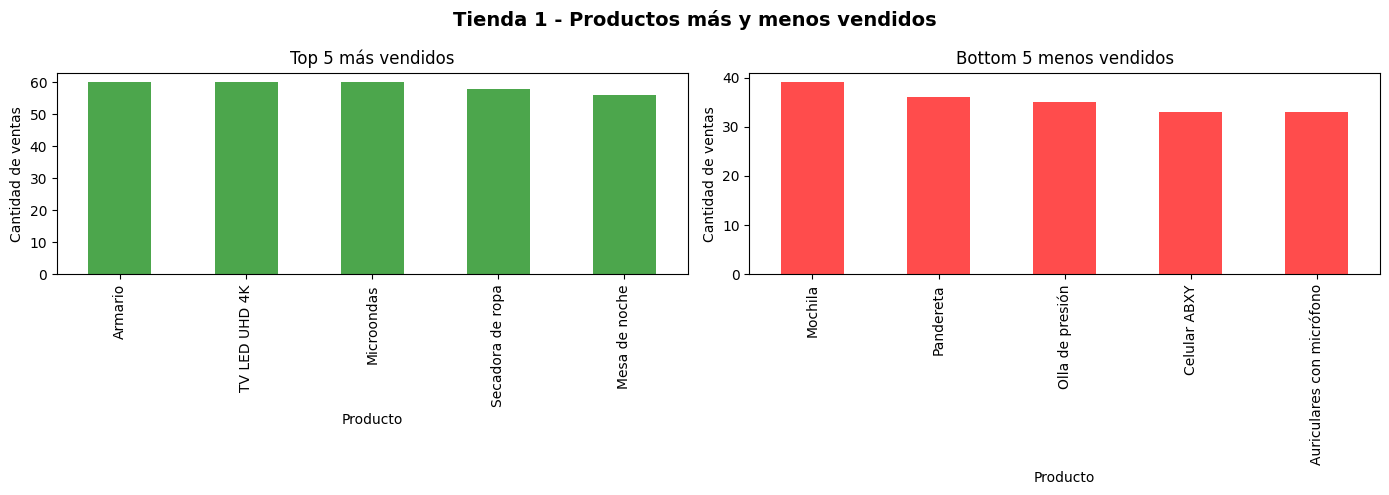

📊 Tienda 2 - Productos más vendidos


Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Producto, dtype: int64

📊 Tienda 2 - Productos menos vendidos


Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
Name: Producto, dtype: int64

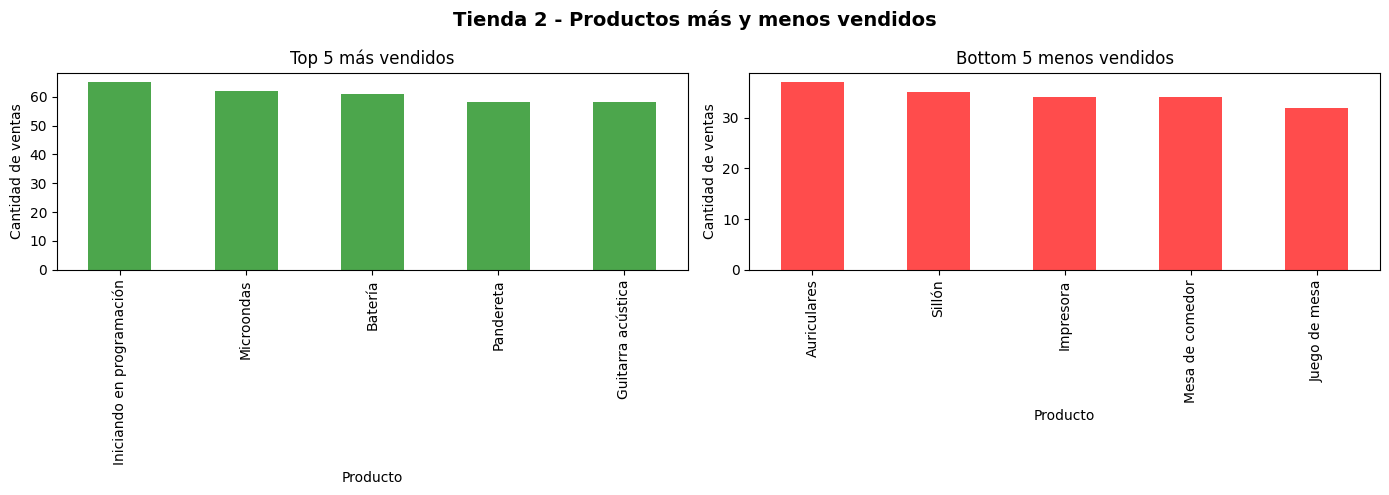

📊 Tienda 3 - Productos más vendidos


Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: Producto, dtype: int64

📊 Tienda 3 - Productos menos vendidos


Producto
Guitarra eléctrica         38
Mochila                    36
Microondas                 36
Set de vasos               36
Bloques de construcción    35
Name: Producto, dtype: int64

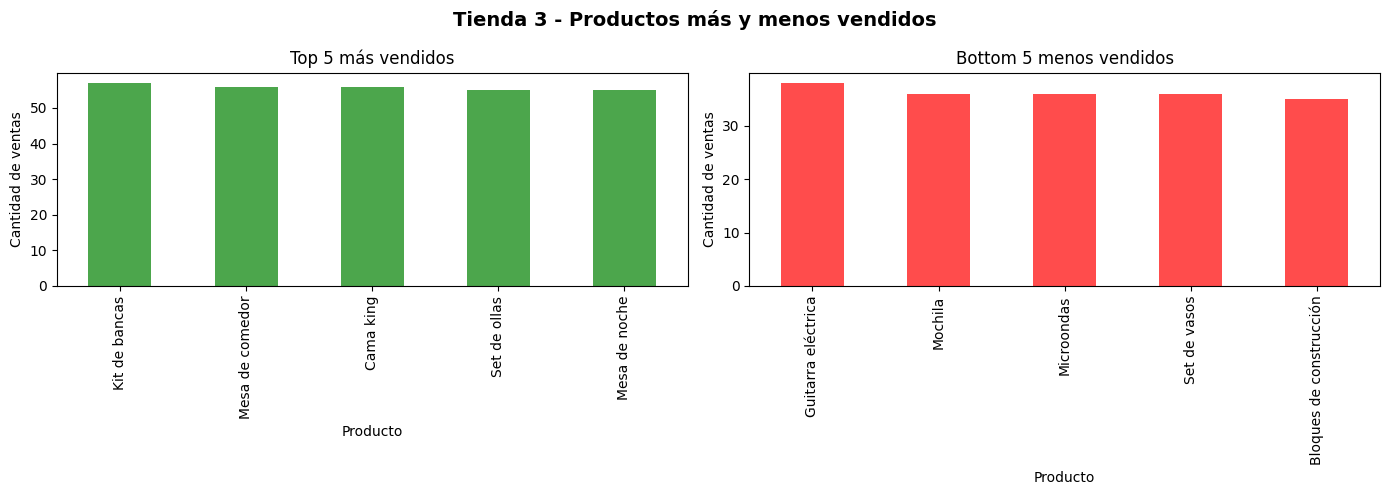

📊 Tienda 4 - Productos más vendidos


Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
Name: Producto, dtype: int64

📊 Tienda 4 - Productos menos vendidos


Producto
Ciencia de datos con Python    38
Refrigerador                   38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: Producto, dtype: int64

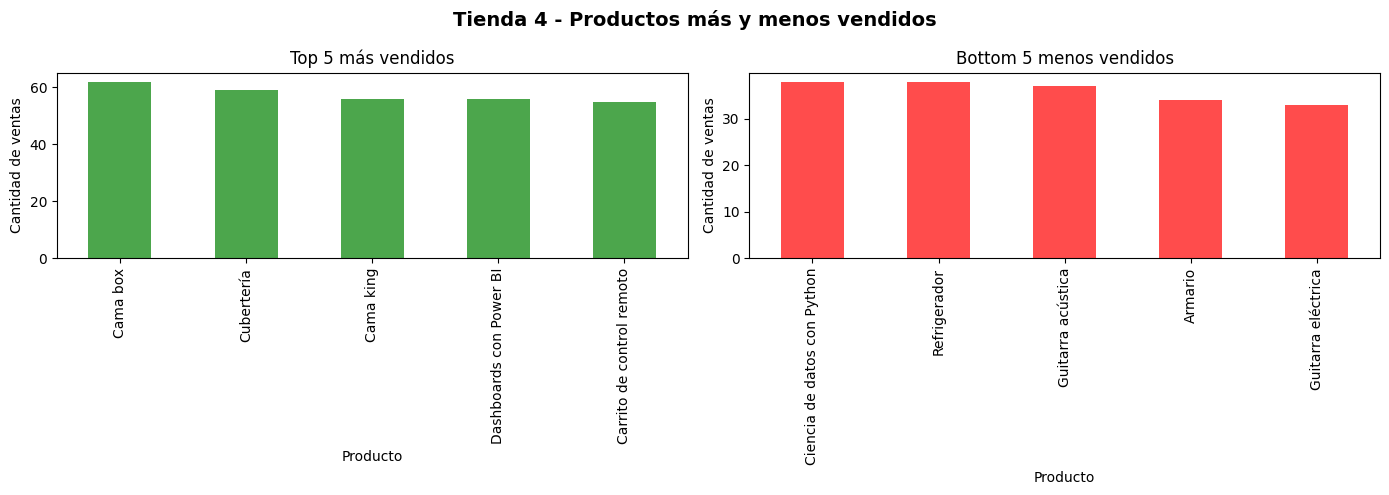

In [38]:
for nombre, df in zip(nombres, tiendas):
    # Agrupamos por producto y contamos las ventas
    ventas = df.groupby("Producto")["Producto"].count().sort_values(ascending=False)

    # Top 5 y Bottom 5
    top5 = ventas.head(5)
    bottom5 = ventas.tail(5)

    print(f"📊 {nombre} - Productos más vendidos")
    display(top5)

    print(f"📊 {nombre} - Productos menos vendidos")
    display(bottom5)

    # --- Visualización ---
    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    fig.suptitle(f"{nombre} - Productos más y menos vendidos", fontsize=14, fontweight="bold")

    # Top 5
    top5.plot(kind="bar", ax=axes[0], color="green", alpha=0.7)
    axes[0].set_title("Top 5 más vendidos")
    axes[0].set_ylabel("Cantidad de ventas")
    axes[0].set_xlabel("Producto")

    # Bottom 5
    bottom5.plot(kind="bar", ax=axes[1], color="red", alpha=0.7)
    axes[1].set_title("Bottom 5 menos vendidos")
    axes[1].set_ylabel("Cantidad de ventas")
    axes[1].set_xlabel("Producto")

    plt.tight_layout()
    plt.show()


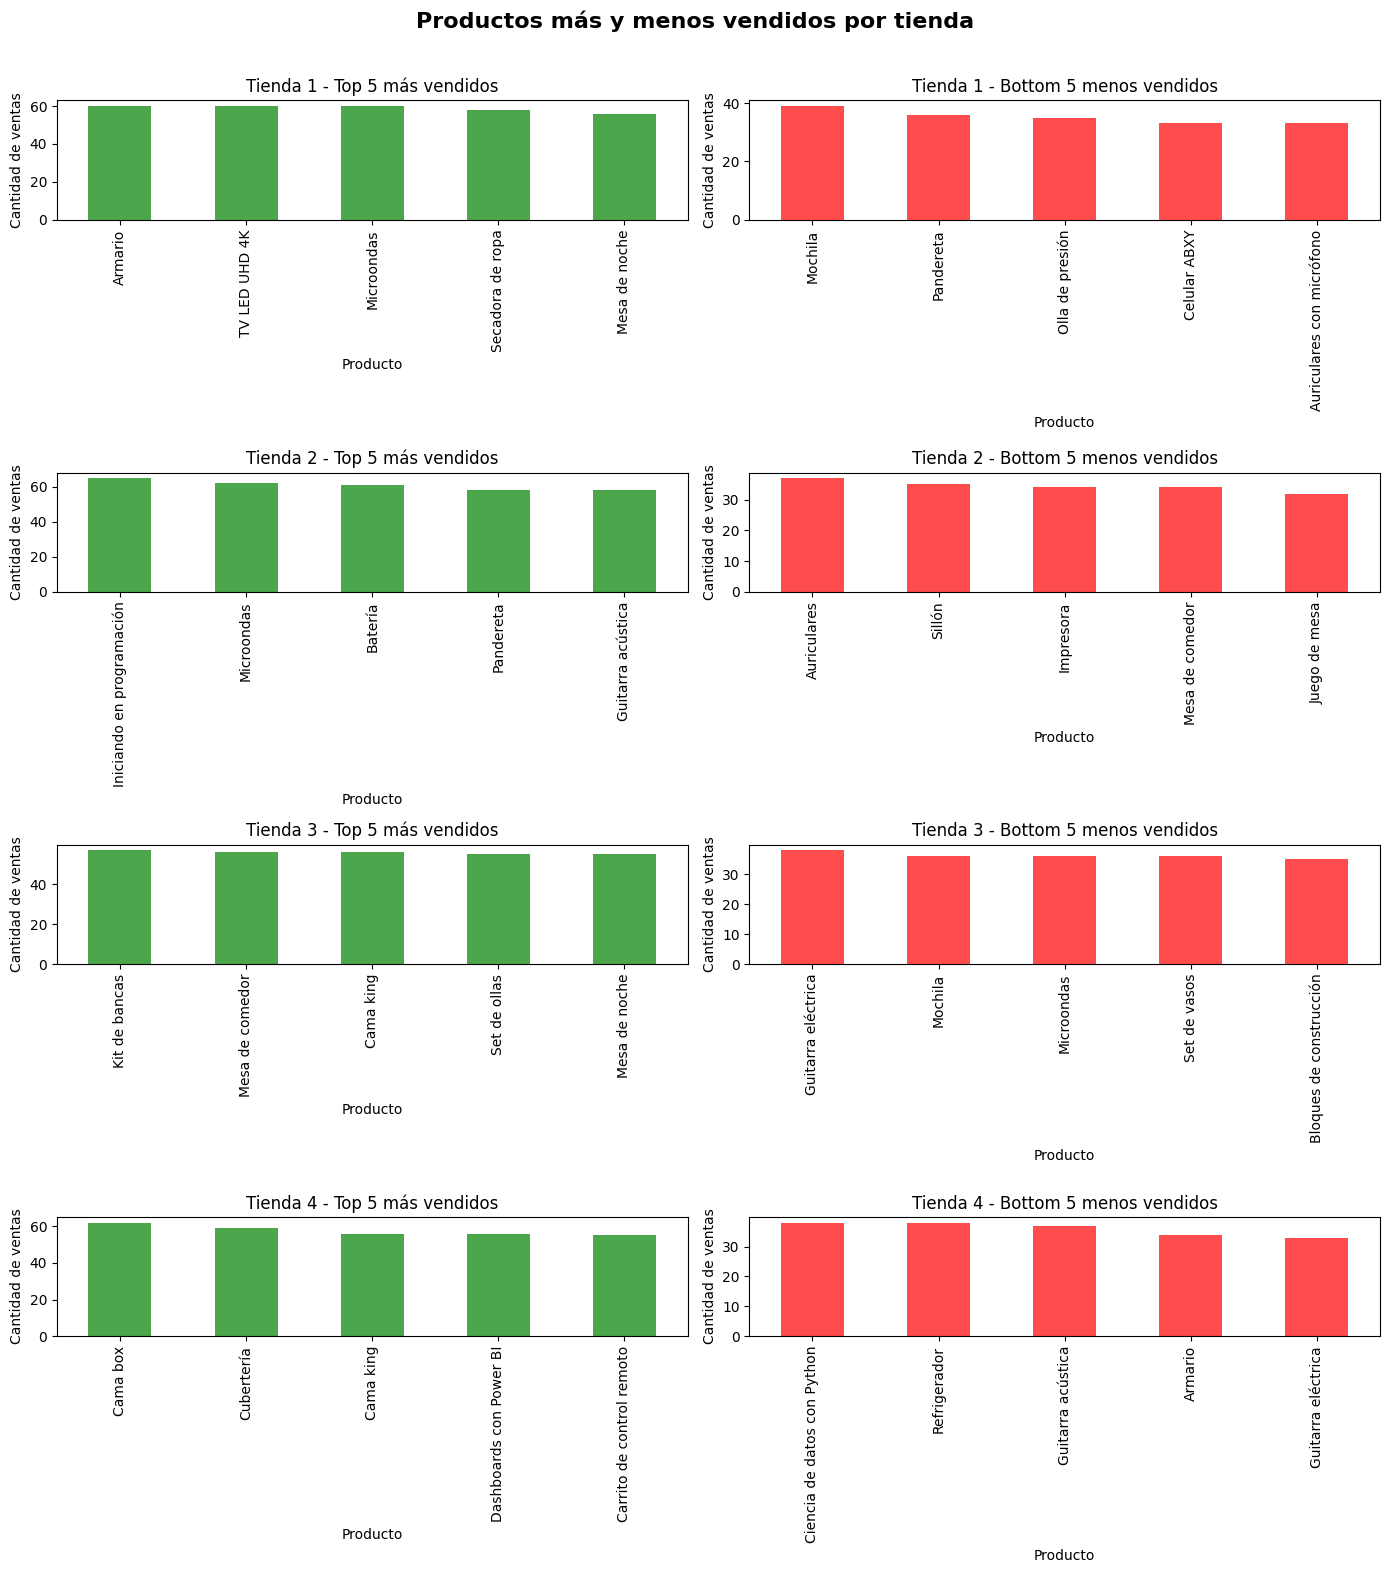

In [51]:
# --- Todas las tiendas en un solo cuadro con subplots ---
def plot_productos_vendidos():
  fig, axes = plt.subplots(len(nombres), 2, figsize=(14, 16))  # 4 filas, 2 columnas
  fig.suptitle("Productos más y menos vendidos por tienda", fontsize=16, fontweight="bold")

  for i, (nombre, df) in enumerate(zip(nombres, tiendas)):
      # Agrupamos por producto y contamos las ventas
      ventas = df.groupby("Producto")["Producto"].count().sort_values(ascending=False)

      # Top 5 y Bottom 5
      top5 = ventas.head(5)
      bottom5 = ventas.tail(5)

      # --- Visualización ---
      # Top 5
      top5.plot(kind="bar", ax=axes[i, 0], color="green", alpha=0.7)
      axes[i, 0].set_title(f"{nombre} - Top 5 más vendidos")
      axes[i, 0].set_ylabel("Cantidad de ventas")
      axes[i, 0].set_xlabel("Producto")

      # Bottom 5
      bottom5.plot(kind="bar", ax=axes[i, 1], color="red", alpha=0.7)
      axes[i, 1].set_title(f"{nombre} - Bottom 5 menos vendidos")
      axes[i, 1].set_ylabel("Cantidad de ventas")
      axes[i, 1].set_xlabel("Producto")

  plt.tight_layout(rect=[0, 0, 1, 0.97])  # Ajusta para que no se solape con el título
  return plt

plot_productos_vendidos().show()

# 5. Envío promedio por tienda

In [39]:
#gasto promedio de cada tienda en envios
# Diccionario de resultados
costo_envio_prom = {}

for nombre, df in zip(nombres, tiendas):
    if "Costo de envío" in df.columns:
        costo_envio_prom[nombre] = df["Costo de envío"].mean()

# Mostrar resultados en un DataFrame
df_envio = pd.DataFrame.from_dict(costo_envio_prom, orient="index", columns=["Costo de Envío Promedio"])
display(df_envio)


Costo de Envío Promedio
Tienda 1             26018.609580
Tienda 2             25216.235693
Tienda 3             24805.680373
Tienda 4             23459.457167

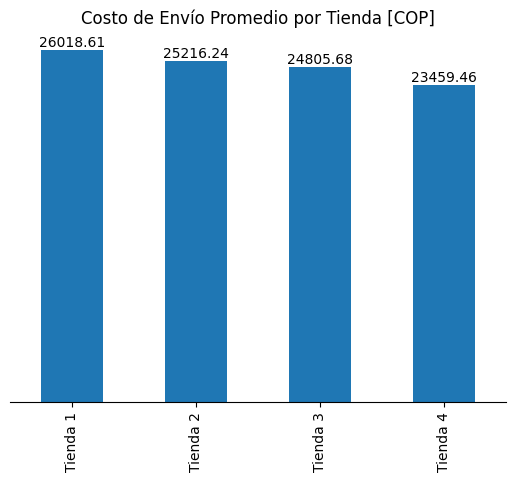

In [124]:
def plot_costo_envio():
  # Crear el gráfico de barras
  ax = df_envio.plot(kind='bar', title='Costo de Envío Promedio por Tienda [COP]', legend=False)
  plt.gca().spines[['top', 'right', 'left']].set_visible(False)

  # Add value labels above the bars
  for container in ax.containers:
      ax.bar_label(container, fmt='%.2f')

  # Remove y-axis tick labels
  plt.yticks([])

  return plt
plot_costo_envio().show()

# Gráficas Insights

In [41]:
df_ingresos

TIENDAS  Ingreso Total [Millones de pesos]  Porcentaje del Total
0  Tienda 1                          1150.8804                 26.13
1  Tienda 2                          1116.3435                 25.35
2  Tienda 3                          1098.0196                 24.93
3  Tienda 4                          1038.3757                 23.58

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Ingreso total por tienda ---
def plot_ingreso_total():
  plt.figure(figsize=(8,6))
  sns.barplot(x="Ingreso Total [Millones de pesos]", y=df_ingresos.TIENDAS, data=df_ingresos.reset_index(), hue=df_ingresos.index, legend=False, palette="Blues_d")
  plt.title("Ingreso Total [M COP] por Tienda", fontsize=14, fontweight="bold")
  #plt.xlabel("Ingreso Total [M COP]")
  #plt.ylabel("Tienda")
  # Eliminar títulos de ejes
  plt.xlabel("")
  plt.ylabel("")

  plt.gca().spines[['top', 'right',]].set_visible(False)
  return plt


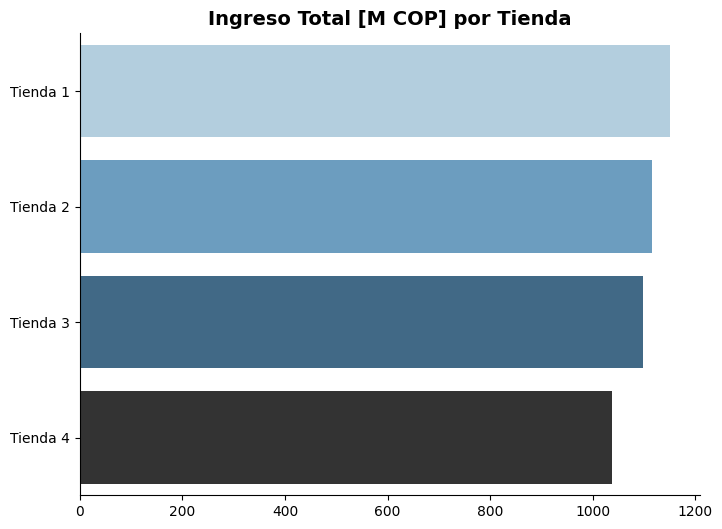

In [43]:
plot_ingreso_total().show()

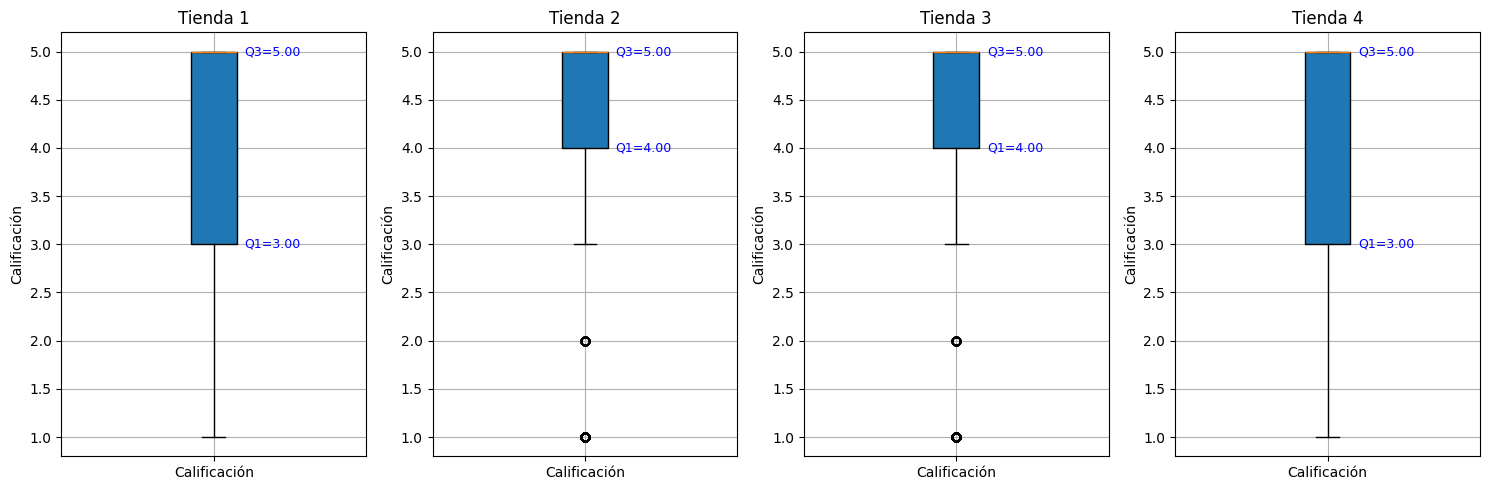

In [44]:
# --- 2. Calificación de cada tienda boxplot ---
boxplot_calificaciones().show()

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 3. Aporte de cada tienda al global ---
def plot_aporte_global():
  plt.figure(figsize=(7,7))
  plt.pie(df_ingresos['Porcentaje del Total'], labels=df_ingresos['TIENDAS'], autopct="%1.1f%%", startangle=90, colors=sns.color_palette('pastel'))
  plt.title("Contribución de cada tienda al Ingreso Total", fontsize=14, fontweight="bold")
  return plt

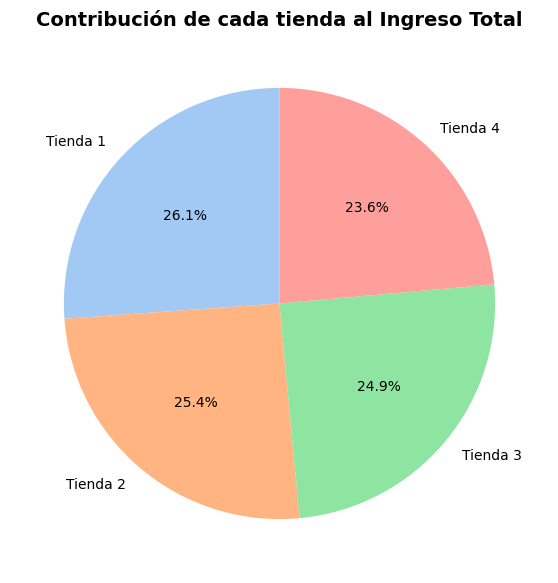

In [46]:
plot_aporte_global().show()

# Extra

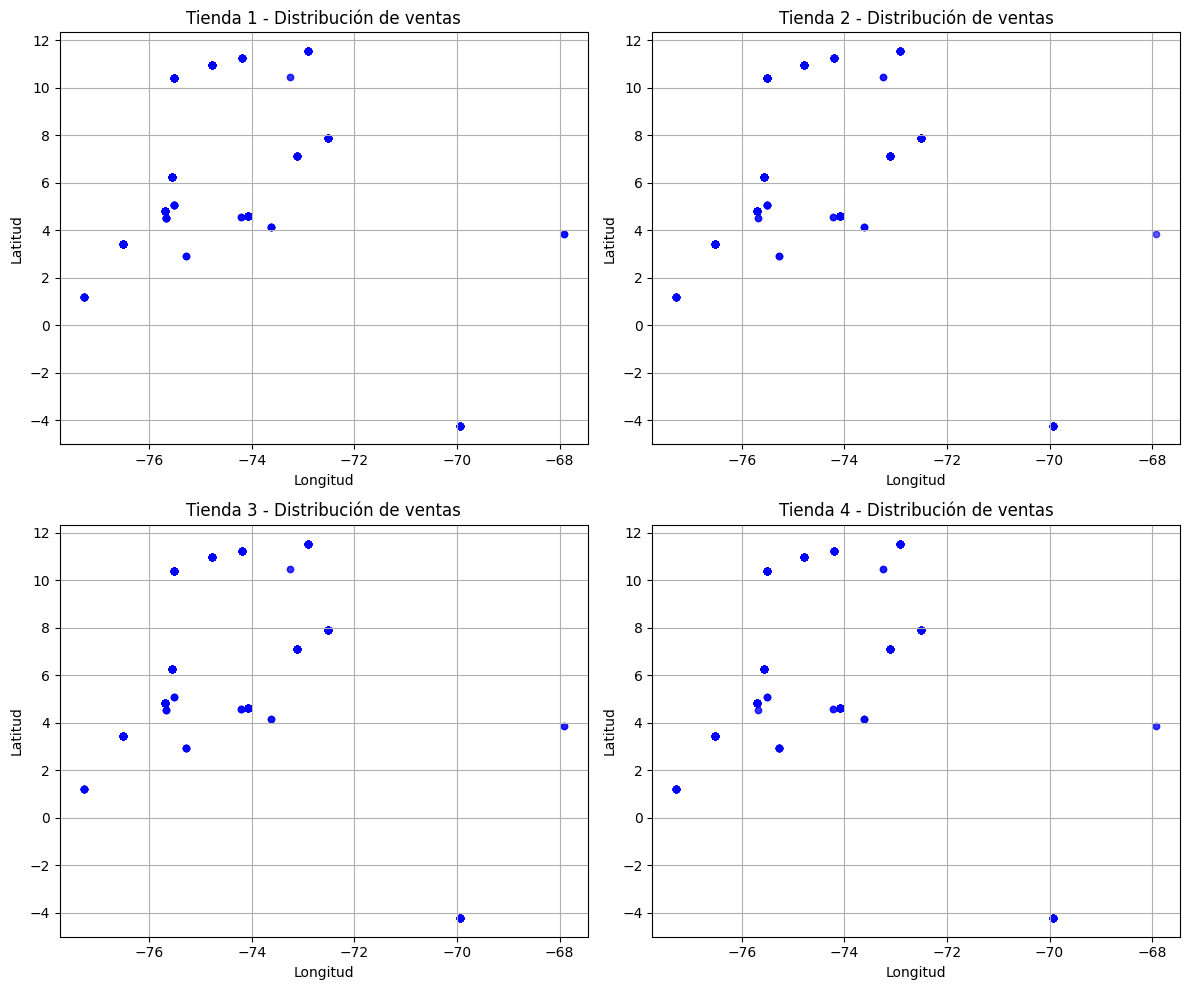

In [47]:
import matplotlib.pyplot as plt

# --- Dispersión geográfica por tienda ---
def plot_geo_scatter(tiendas, nombres):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, (df, nombre) in enumerate(zip(tiendas, nombres)):
        axes[i].scatter(df["lon"], df["lat"], alpha=0.4, s=20, c="blue")
        axes[i].set_title(f"{nombre} - Distribución de ventas")
        axes[i].set_xlabel("Longitud")
        axes[i].set_ylabel("Latitud")
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

plot_geo_scatter(tiendas, nombres)


In [127]:
import folium

def plot_geo_map(df, nombre):
    mapa = folium.Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=5,
                      width="60%", height="60%")
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row["lat"], row["lon"]],
            radius=3,
            color="blue",
            fill=True,
            fill_opacity=0.6
        ).add_to(mapa)
    return mapa

# Ejemplo para Tienda 1
plot_geo_map(tienda, "Tienda 1")


# 📊 Informe Final de Análisis – Alura Store

## 1. Introducción
El Sr. Juan desea vender una de sus cuatro tiendas con el fin de invertir en un nuevo negocio.  
Para tomar la mejor decisión, se realizó un análisis exhaustivo de las ventas y el rendimiento de cada tienda.  

El objetivo fue identificar cuál de las tiendas tiene un desempeño menos favorable, considerando factores como:  

- Ingresos totales por tienda.  
- Categorías de productos más y menos vendidas.  
- Calificaciones promedio de los clientes.  
- Productos más y menos vendidos.  
- Coste de envío promedio.  
- Distribución geográfica de las ventas.  

Este informe presenta los hallazgos principales y concluye con una recomendación clara sobre qué tienda debe ser vendida.  

---

## 2. Desarrollo del Análisis

### 2.1 Ingresos Totales
Se calcularon los ingresos de cada tienda.  


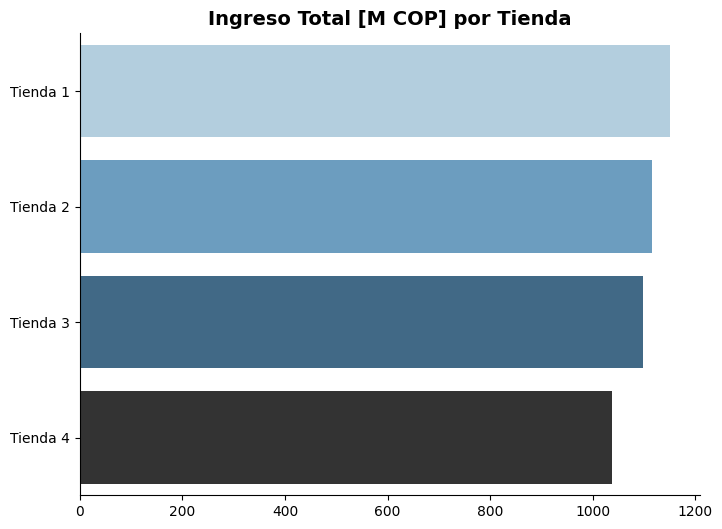

In [49]:
plot_ingreso_total().show()

Se observa que la tienda **1** es la de mayor facturación, mientras que la tienda **4** presenta los ingresos más bajos, indicando menor competitividad en el mercado.  

---

### 2.2 Categorías de Productos
Se analizaron los productos más vendidos de cada tienda y las categorías más populares del global de las tiendas.  


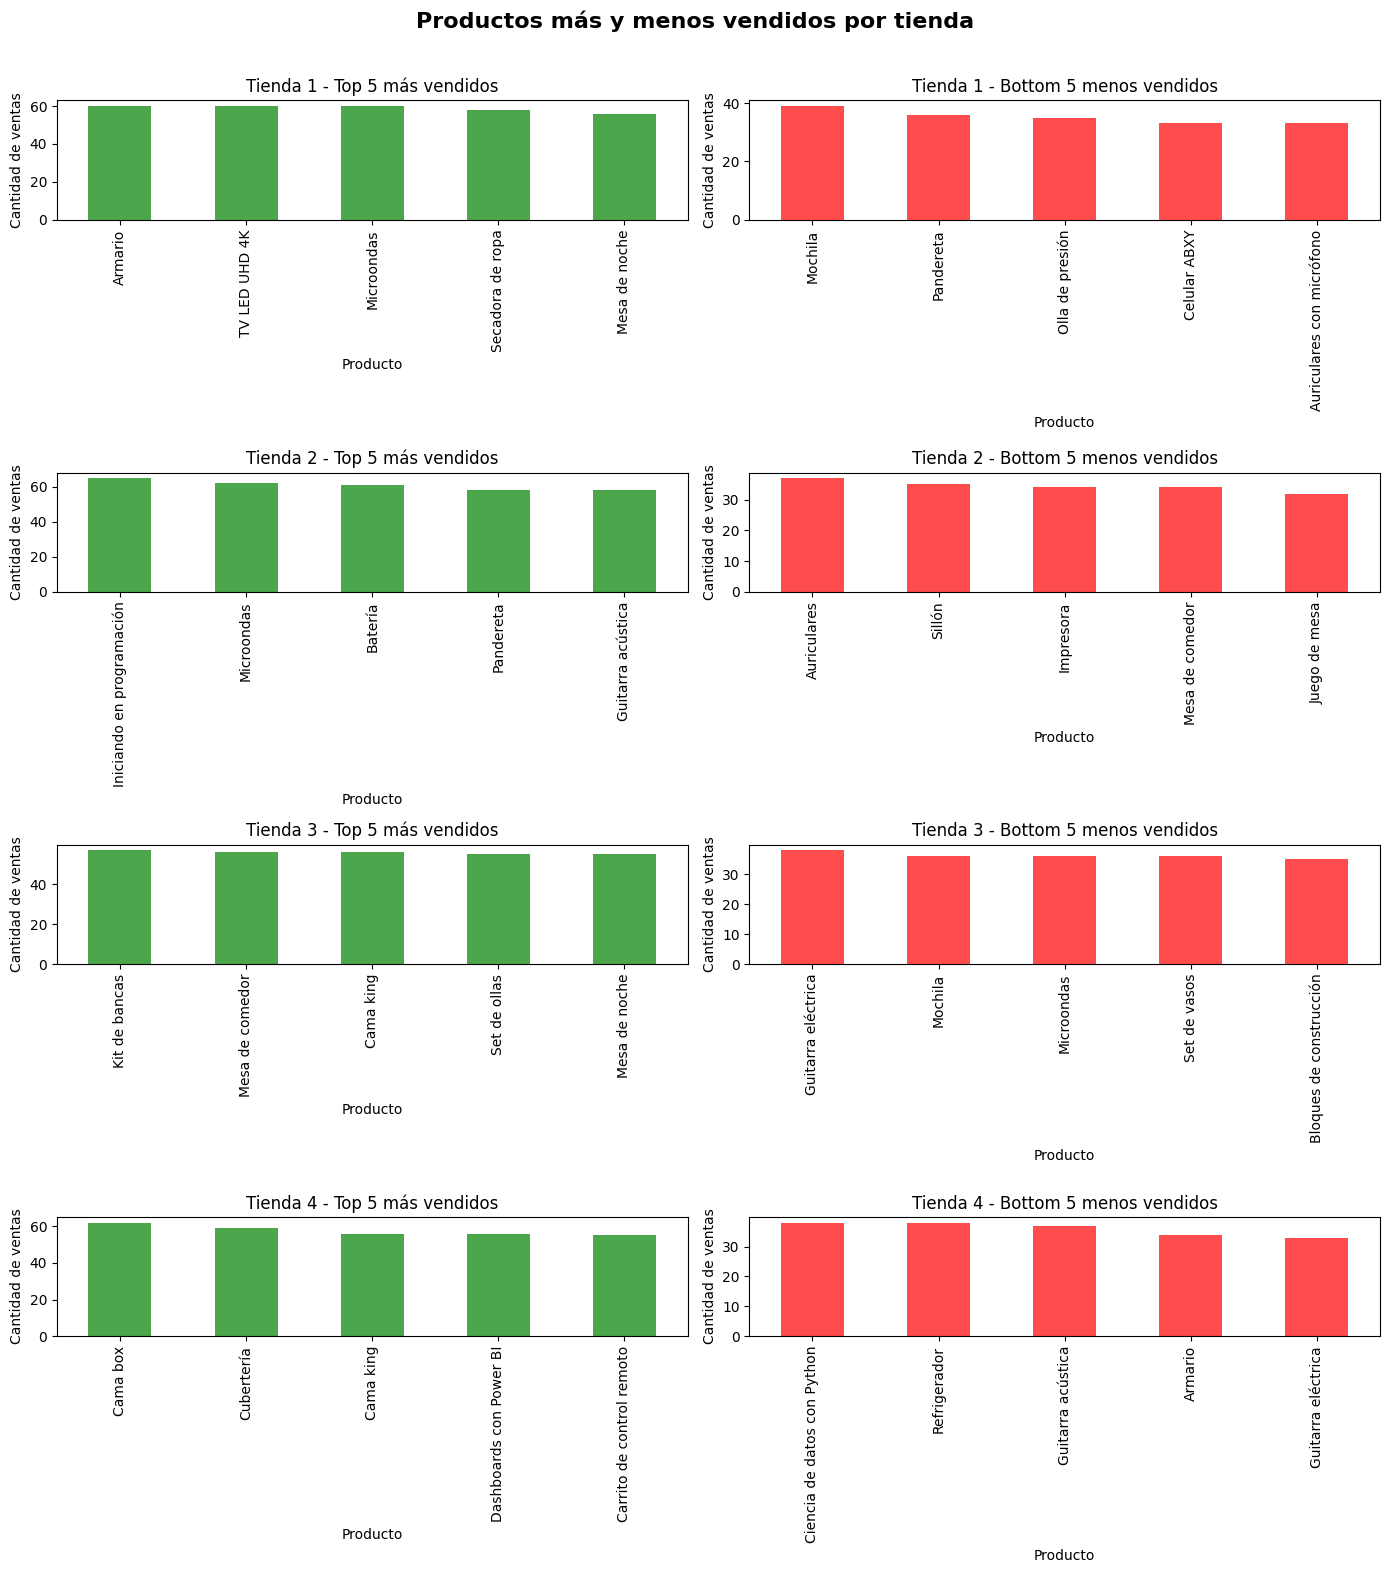

In [52]:
plot_productos_vendidos().show()

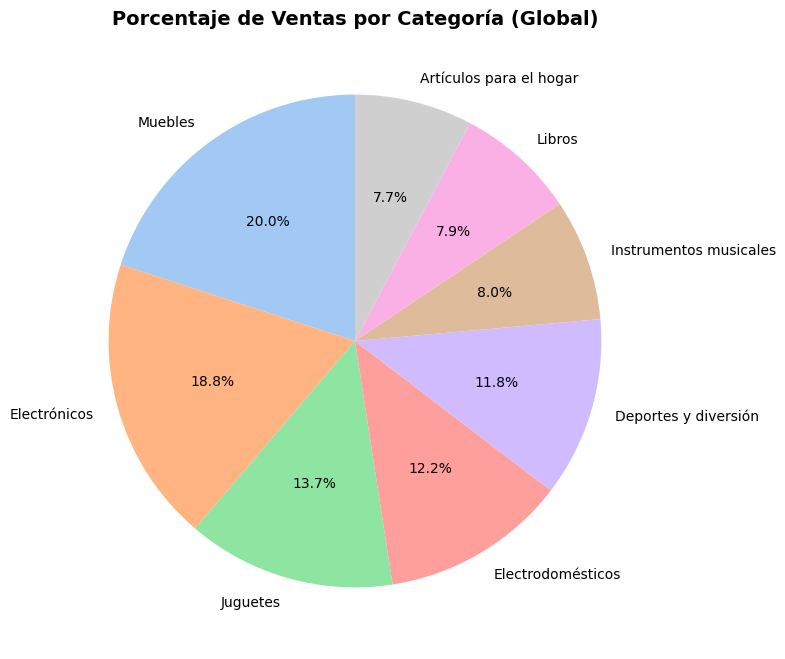

In [102]:
plot_categorias_global().show()

El análisis muestra que la categoria Muebles,Electrónicos, Juguetes, son el top 3 de categorías más vendidas (52.5%) versus el (47.5%) del resto de categorias.

---

### 2.3 Calificaciones Promedio
Se evaluó la satisfacción de los clientes a través de la calificación promedio.  



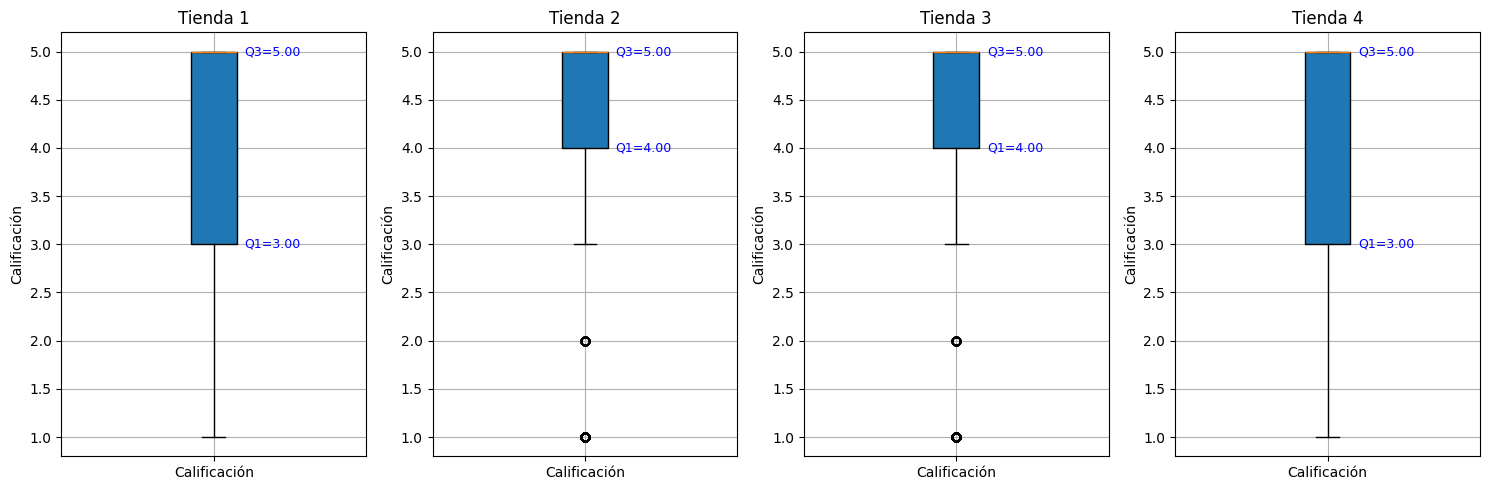

In [103]:
boxplot_calificaciones().show()

Las tiendas **2** y **3** tienen calificaciones altas y consistentes, mientras que la tienda **1** y **4** muestra la menor satisfacción de clientes, lo que podría reflejar problemas en la calidad del servicio o los productos.  

---

### 2.4 Productos Más y Menos Vendidos
Se identificaron los productos más vendidos y los de menor salida en cada tienda.  

Las tiendas **1** y **4** concentran sus ventas en varios productos populares de diferentes categorías, mientras que la tienda **2** y **3** depende de pocos productos pertenecientes la la categoría Instrumentos musicales, y Muebles respectivamente, limitando su crecimiento.  

---

### 2.5 Coste de Envío Promedio
Se comparó el coste de envío promedio entre tiendas.  



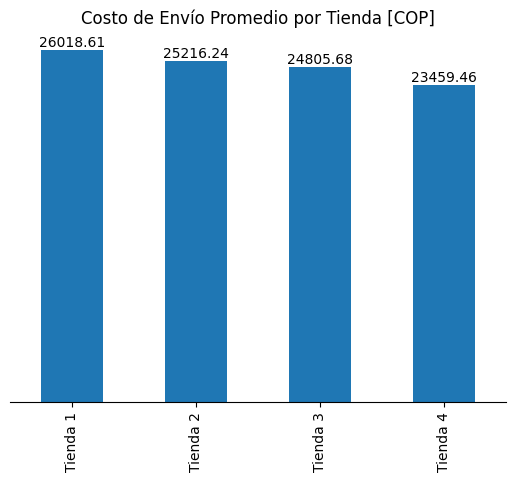

In [125]:
plot_costo_envio().show()

El análisis muestra que la tienda **1** tiene los mayores costes de envío promedio pese a ser la que más facturación genera, lo que reduce su rentabilidad y puede afectar la experiencia del cliente.  

---

### 2.6 Distribución Geográfica
Se realizó un análisis de las coordenadas de ventas con mapas interactivos y gráficos de dispersión.  



In [128]:
plot_geo_map(tienda, "Tienda 1")

Se observa que las tiendas tienen mayor cobertura en la región andina, pacifica y atlantica, dejando de lado la región orinoquía y amazonas, lo que es una señal para entrar a nuevos mercados en esa zona no atendida.

---

## 3. Conclusión y Recomendación
Con base en todos los factores analizados:  

- La tienda **4** presenta **los ingresos más bajos**,  
- Tiene **menor diversidad de categorías**,  
- Recibe **peores calificaciones de clientes**,  
- Presenta **costos de envío más altos** en comparación con otras tiendas,  
- Y su distribución geográfica **no le da una ventaja competitiva clara**.  

Por estas razones, **se recomienda vender la tienda 4**.  
Las demás tiendas presentan fortalezas más claras: mayores ingresos, mejor percepción del cliente y ubicaciones más favorables.  

En conclusión, vender la tienda **B** permitirá al Sr. Juan liberar recursos de una operación menos rentable y enfocarlos en un nuevo negocio con mayor potencial de crecimiento.  


# Ignorar

In [108]:
productos_mas_vendidos_x_tienda_cat = productos_mas_vendidos_x_tienda.reset_index()
productos_mas_vendidos_x_tienda_cat = pd.merge(productos_mas_vendidos_x_tienda_cat, tienda[['Producto', 'Categoría del Producto']],
                                               on='Producto', how='left')
productos_mas_vendidos_x_tienda_cat = productos_mas_vendidos_x_tienda_cat.drop_duplicates(subset=['Producto'])
display(productos_mas_vendidos_x_tienda_cat.head(5))

Producto  Tienda 1  Tienda 2  Tienda 3  Tienda 4  \
0             Armario        60        54        49        34   
60      TV LED UHD 4K        60        45        42        40   
120        Microondas        60        62        36        48   
180  Secadora de ropa        58        57        45        40   
238     Mesa de noche        56        44        55        55   

    Categoría del Producto  
0                  Muebles  
60            Electrónicos  
120      Electrodomésticos  
180      Electrodomésticos  
238                Muebles

In [120]:
productos_mas_vendidos_x_tienda_cat.sort_values(by='Tienda 2', inplace=False, ascending=False).head(5)

Producto  Tienda 1  Tienda 2  Tienda 3  Tienda 4  \
1862  Iniciando en programación        41        65        46        43   
120                  Microondas        60        62        36        48   
621                     Batería        53        61        41        48   
2222                  Pandereta        36        58        51        52   
1211          Guitarra acústica        46        58        47        37   

      Categoría del Producto  
1862                  Libros  
120        Electrodomésticos  
621   Instrumentos musicales  
2222  Instrumentos musicales  
1211  Instrumentos musicales